# Importing Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Import the Dataset

Link:"https://raw.githubusercontent.com/omairaasim/machine_learning/master/project_11_k_nearest_neighbor/iphone_purchase_records.csv"

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/omairaasim/machine_learning/master/project_11_k_nearest_neighbor/iphone_purchase_records.csv")

In [5]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
df.shape

(400, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [9]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [14]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [27]:
# From Gender, how many people have purchased Iphone 
df.Gender.groupby(df["Purchase Iphone"]).value_counts()

Purchase Iphone  Gender
0                Male      130
                 Female    127
1                Female     77
                 Male       66
Name: Gender, dtype: int64

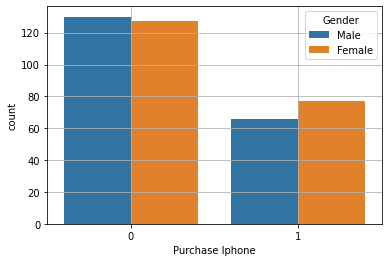

In [24]:
sns.countplot(x="Purchase Iphone",data=df,hue="Gender")
plt.grid()

In [28]:
df.loc[df["Purchase Iphone"]==1,"Gender"].value_counts()

Female    77
Male      66
Name: Gender, dtype: int64

# Spliting of Data

In [30]:
df.head(10)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [32]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [33]:
x

,Gender,Age,Salary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [34]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

# Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
enc = LabelEncoder()

In [37]:
x.Gender = enc.fit_transform(x.Gender)

In [38]:
x

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [39]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  400 non-null    int32
 1   Age     400 non-null    int64
 2   Salary  400 non-null    int64
dtypes: int32(1), int64(2)
memory usage: 7.9 KB


# Splitting the data into sets

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler makes the mean of the distribution 0.
About **68%** of the values will lie be between **-1 and 1**

In [40]:
skf = StratifiedKFold(n_splits=5)

In [41]:
for train_idex,test_index in skf.split(x,y):
    x_train,x_test = x.iloc[train_idex],x.iloc[test_index]
    y_train,y_test = y.iloc[train_idex],y.iloc[test_index]

# Feature Scaling

In [44]:
scale =  StandardScaler()

In [46]:
x_train= scale.fit_transform(x_train)
x_test= scale.fit_transform(x_test)

In [47]:
x_train

array([[ 1.02532046, -1.61062735, -1.48261454],
       [ 1.02532046, -0.10854866, -1.45444971],
       [-0.97530483, -0.95346792, -0.80665849],
       [-0.97530483, -0.859588  , -0.41235079],
       [ 1.02532046, -1.61062735,  0.12278108],
       [ 1.02532046, -0.859588  , -0.38418596],
       [-0.97530483, -0.859588  ,  0.34809976],
       [-0.97530483, -0.39018841,  2.20697891],
       [ 1.02532046, -1.04734784, -1.08830685],
       [-0.97530483, -0.10854866, -0.18703211],
       [-0.97530483, -0.95346792,  0.23544042],
       [-0.97530483, -0.95346792, -0.55317497],
       [ 1.02532046, -1.51674743,  0.40442943],
       [ 1.02532046, -0.39018841, -1.51077938],
       [ 1.02532046, -1.70450727,  0.29177009],
       [ 1.02532046, -0.67182817,  0.23544042],
       [ 1.02532046,  1.01801037, -1.31362553],
       [ 1.02532046,  0.83025053, -1.28546069],
       [ 1.02532046,  0.92413045, -1.22913102],
       [-0.97530483,  1.11189029, -1.20096619],
       [ 1.02532046,  0.83025053, -1.398

# Model Selection

In [61]:
log = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the model

In [62]:
log.fit(x_train,y_train)
knn.fit(x_train,y_train)

KNeighborsClassifier()

# Test the model

In [63]:
y_knn_pred = knn.predict(x_test)

In [64]:
newdf=pd.DataFrame({"Actual":y_test,"Predict":y_knn_pred})

In [65]:
newdf.head()

,Actual,Predict
266,0,0
267,0,0
269,0,0
270,0,1
276,0,0


In [66]:
confusion_matrix(y_test,y_knn_pred)

array([[46,  5],
       [ 7, 22]], dtype=int64)

In [ ]:
# Accuracy = (46+22)/80 = 68/80 = 0.85 = 85%

In [56]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(y_test,y_knn_pred)

0.85

In [76]:
lis=[i for i in range(3,100) if i%2!=0]

In [77]:
acc=[]
dic={}
for i in lis:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_knn_pred= knn.predict(x_test)
    acc.append(accuracy_score(y_test,y_knn_pred))
    dic[i]=accuracy_score(y_test,y_knn_pred)
    
print(max(acc))    

0.8875


In [78]:
dic

{3: 0.8375,
 5: 0.85,
 7: 0.85,
 9: 0.8625,
 11: 0.8875,
 13: 0.8875,
 15: 0.875,
 17: 0.85,
 19: 0.8,
 21: 0.7875,
 23: 0.775,
 25: 0.7625,
 27: 0.7375,
 29: 0.7375,
 31: 0.7375,
 33: 0.7375,
 35: 0.7375,
 37: 0.7375,
 39: 0.7375,
 41: 0.7375,
 43: 0.7375,
 45: 0.7375,
 47: 0.7375,
 49: 0.7375,
 51: 0.7375,
 53: 0.7375,
 55: 0.7375,
 57: 0.7375,
 59: 0.7375,
 61: 0.7375,
 63: 0.725,
 65: 0.725,
 67: 0.725,
 69: 0.725,
 71: 0.725,
 73: 0.725,
 75: 0.725,
 77: 0.725,
 79: 0.725,
 81: 0.725,
 83: 0.725,
 85: 0.725,
 87: 0.725,
 89: 0.7125,
 91: 0.7,
 93: 0.7,
 95: 0.7,
 97: 0.6875,
 99: 0.6875}

In [87]:
y_log_pred=log.predict(x_test)

In [88]:
accuracy_score(y_test,y_log_pred)

0.725

In [6]:
%autosave 20

Autosaving every 20 seconds
